# Problem 1 : Predicting CentralAir using SalePrice
Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
Use the following variables from the dataset in this problem : SalePrice and CentralAir

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


houseData = pd.read_csv('train.csv')

In [2]:
cntrlAir = pd.DataFrame(houseData['CentralAir'])  # Response
salprc = pd.DataFrame(houseData['SalePrice'])      # Predictor

a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.


Y    1365
N      95
Name: CentralAir, dtype: int64

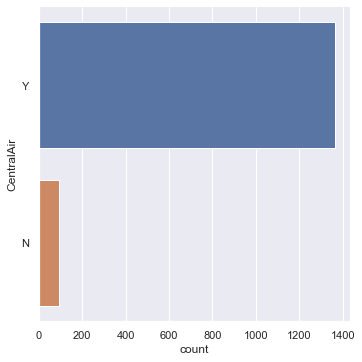

In [3]:
sb.catplot(y = "CentralAir", data = cntrlAir, kind = "count")
cntrlAir["CentralAir"].value_counts()

b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

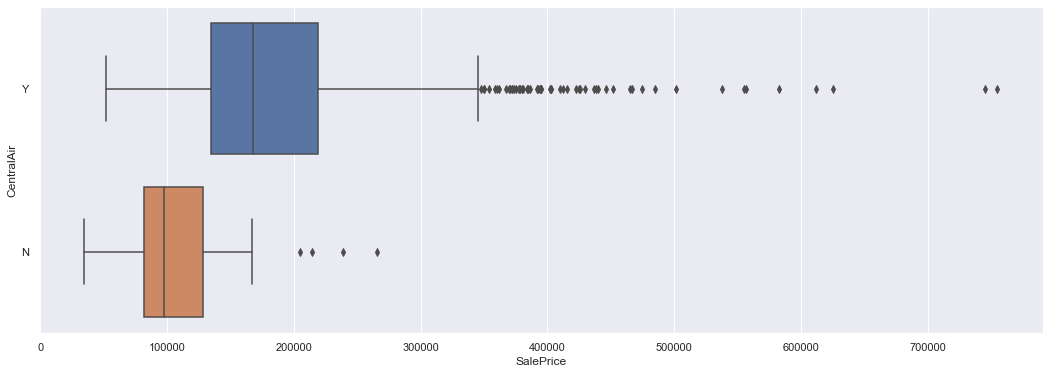

In [5]:
# Create a joint dataframe by concatenating Total and Legendary
concatDF = pd.concat([salprc, cntrlAir], axis = 1).reindex(salprc.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = concatDF, orient = "h")

c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).


In [39]:
# Split the CentralAir-SalePrice Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(salprc, cntrlAir, test_size = 0.246)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.
    

In [40]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree


[Text(334.8, 543.6, 'SalePrice <= 107700.0\ngini = 0.116\nsamples = 1100\nvalue = [68, 1032]\nclass = Has CentralAir'),
 Text(167.4, 326.16, 'SalePrice <= 79250.0\ngini = 0.45\nsamples = 114\nvalue = [39, 75]\nclass = Has CentralAir'),
 Text(83.7, 108.72000000000003, 'gini = 0.461\nsamples = 25\nvalue = [16, 9]\nclass = No CentralAir'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.383\nsamples = 89\nvalue = [23, 66]\nclass = Has CentralAir'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.057\nsamples = 986\nvalue = [29, 957]\nclass = Has CentralAir'),
 Text(418.5, 108.72000000000003, 'gini = 0.15\nsamples = 233\nvalue = [19, 214]\nclass = Has CentralAir'),
 Text(585.9, 108.72000000000003, 'gini = 0.026\nsamples = 753\nvalue = [10, 743]\nclass = Has CentralAir')]

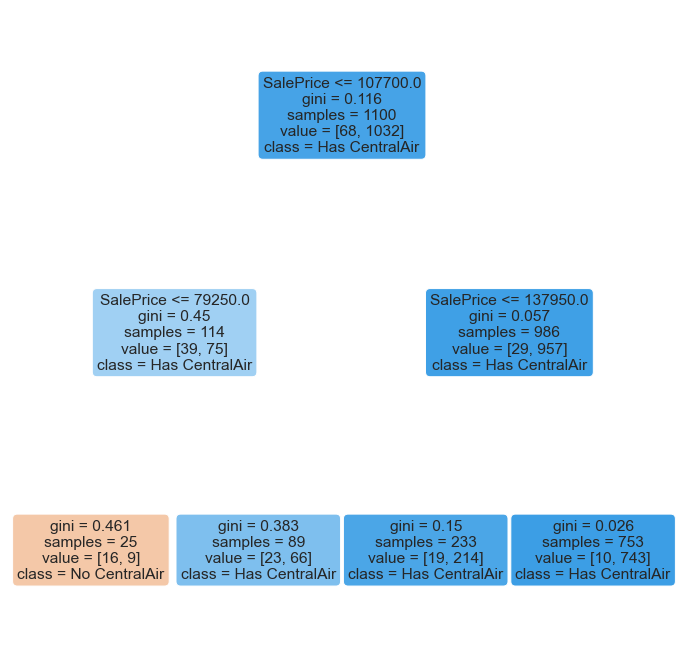

In [41]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No CentralAir","Has CentralAir"])

g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.


<AxesSubplot:>

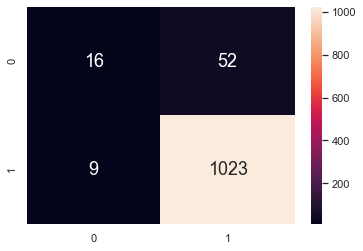

In [42]:
# Predict whether has central air corresponding to sale price
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.


In [43]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# TN[0][0] FP[0][1]
# FN[1][0] TP[1][1]
#print(confusion_matrix(y_train, y_train_pred)[1][0])

TN = confusion_matrix(y_train, y_train_pred)[0][0]
FP = confusion_matrix(y_train, y_train_pred)[0][1]
FN = confusion_matrix(y_train, y_train_pred)[1][0]
TP = confusion_matrix(y_train, y_train_pred)[1][1]


print("True Positive Rate = ", TP/(FN+TP) )
print("True Negative Rate = ", TN/(TN+FP) )
print("False Positive Rate = ", FP/(TN+FP))
print("False Negative Rate = ", FN/(FN+TP))

Classification Accuracy 	: 0.9445454545454546
True Positive Rate =  0.9912790697674418
True Negative Rate =  0.23529411764705882
False Positive Rate =  0.7647058823529411
False Negative Rate =  0.00872093023255814


i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.


<AxesSubplot:>

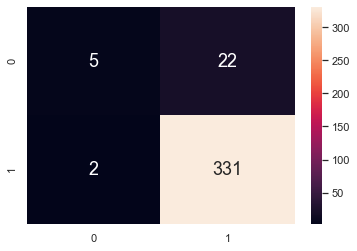

In [44]:
# Predict whether has central air corresponding to sale price
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [45]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# TN[0][0] FP[0][1]
# FN[1][0] TP[1][1]
#print(confusion_matrix(y_train, y_train_pred)[1][0])

TN = confusion_matrix(y_test, y_test_pred)[0][0]
FP = confusion_matrix(y_test, y_test_pred)[0][1]
FN = confusion_matrix(y_test, y_test_pred)[1][0]
TP = confusion_matrix(y_test, y_test_pred)[1][1]


print("True Positive Rate = ", TP/(FN+TP) )
print("True Negative Rate = ", TN/(TN+FP) )
print("False Positive Rate = ", FP/(TN+FP))
print("False Negative Rate = ", FN/(FN+TP))

Classification Accuracy 	: 0.9333333333333333
True Positive Rate =  0.993993993993994
True Negative Rate =  0.18518518518518517
False Positive Rate =  0.8148148148148148
False Negative Rate =  0.006006006006006006


# Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.


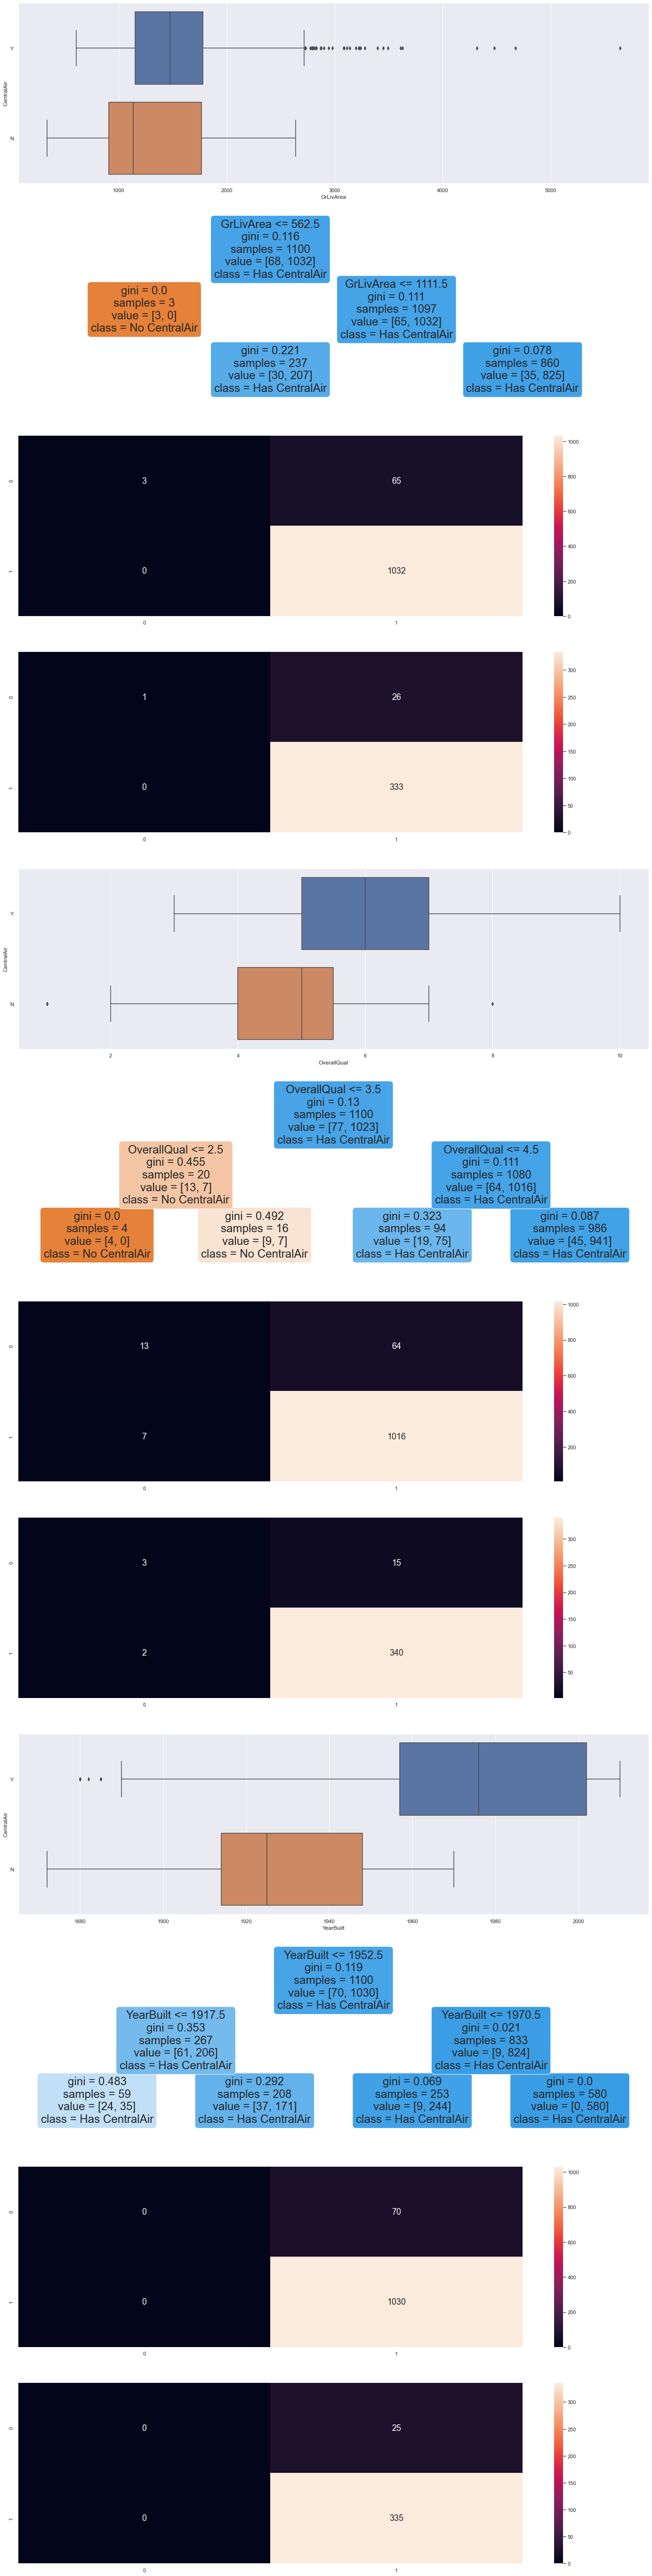

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [59]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
    
####################

houseData = pd.read_csv('train.csv')

cntrlAir = pd.DataFrame(houseData['CentralAir'])  # Response
predictors = ['GrLivArea', 'OverallQual', 'YearBuilt']

f, axes = plt.subplots(12, 1, figsize=(24,100))

count = 0
for predictor in predictors:
    thePREDICTOR = pd.DataFrame(houseData[predictor])      # Predictor
    
    #sb.catplot(y = "CentralAir", data = cntrlAir, kind = "count")
    #cntrlAir["CentralAir"].value_counts()
    
    
    
    # Create a joint dataframe by concatenating Total and Legendary
    concatDF = pd.concat([thePREDICTOR, cntrlAir], axis = 1).reindex(thePREDICTOR.index)
    # Joint Boxplot of Total Train against Legendary Train
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = predictor, y = "CentralAir", data = concatDF, orient = "h", ax=axes[count])
    count+=1
    
    
    
    # Split the CentralAir-SalePrice Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(thePREDICTOR, cntrlAir, test_size = 0.246)
    #print("Train Set :", y_train.shape, X_train.shape)
    #print("Test Set  :", y_test.shape, X_test.shape)
    
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 2)
    # Train the Decision Tree Classifier model
    dectree.fit(X_train, y_train)
    

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictor], 
          class_names=["No CentralAir","Has CentralAir"], ax=axes[count])
    count+=1
    
    
    
    # Predict whether has central air corresponding to sale price
    y_train_pred = dectree.predict(X_train)
    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[count])
    count+=1
    
    
    # Predict whether has central air corresponding to sale price
    y_test_pred = dectree.predict(X_test)
    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[count])
    count +=1

# Problem 3 : Best Uni-Variate Model to Predict CentralAir
Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on
both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”

In [48]:
predictors = ['SalePrice','GrLivArea', 'OverallQual', 'YearBuilt']

for predictor in predictors:
    thePREDICTOR = pd.DataFrame(houseData[predictor])      # Predictor
    
    # Split the CentralAir-SalePrice Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(thePREDICTOR, cntrlAir, test_size = 0.246)
    #print("Train Set :", y_train.shape, X_train.shape)
    #print("Test Set  :", y_test.shape, X_test.shape)
    
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 2)
    # Train the Decision Tree Classifier model
    dectree.fit(X_train, y_train)
    
    
    print(predictor)
    
    print("> TRAINING DATA:")
    # Predict whether has central air corresponding to sale price
    y_train_pred = dectree.predict(X_train)
    # Plot the two-way Confusion Matrix
    #from sklearn.metrics import confusion_matrix
    #sb.heatmap(confusion_matrix(y_train, y_train_pred), 
    #           annot = True, fmt=".0f", annot_kws={"size": 18})

    # Print the Classification Accuracy
    print(">> Classification Accuracy \t:", dectree.score(X_train, y_train))

    # TN[0][0] FP[0][1]
    # FN[1][0] TP[1][1]
    #print(confusion_matrix(y_train, y_train_pred)[1][0])

    TN = confusion_matrix(y_train, y_train_pred)[0][0]
    FP = confusion_matrix(y_train, y_train_pred)[0][1]
    FN = confusion_matrix(y_train, y_train_pred)[1][0]
    TP = confusion_matrix(y_train, y_train_pred)[1][1]

    print(">> True Positive Rate = ", TP/(FN+TP) )
    #print(">> True Negative Rate = ", TN/(TN+FP) )
    print(">> False Positive Rate = ", FP/(TN+FP))
    #print(">> False Negative Rate = ", FN/(FN+TP))
    
    ##################################################
    
    print("> TESTING DATA: ")
    # Predict whether has central air corresponding to sale price
    y_test_pred = dectree.predict(X_test)

    # Plot the two-way Confusion Matrix
    #from sklearn.metrics import confusion_matrix
    #sb.heatmap(confusion_matrix(y_test, y_test_pred), 
    #    annot = True, fmt=".0f", annot_kws={"size": 18})
    
    # Print the Classification Accuracy
    print(">> Classification Accuracy \t:", dectree.score(X_test, y_test))

    # TN[0][0] FP[0][1]
    # FN[1][0] TP[1][1]
    #print(confusion_matrix(y_train, y_train_pred)[1][0])

    TN = confusion_matrix(y_test, y_test_pred)[0][0]
    FP = confusion_matrix(y_test, y_test_pred)[0][1]
    FN = confusion_matrix(y_test, y_test_pred)[1][0]
    TP = confusion_matrix(y_test, y_test_pred)[1][1]


    print(">> True Positive Rate = ", TP/(FN+TP) )
    #print(">> True Negative Rate = ", TN/(TN+FP) )
    print(">> False Positive Rate = ", FP/(TN+FP))
    #print(">> False Negative Rate = ", FN/(FN+TP))
    print("")

SalePrice
> TRAINING DATA:
>> Classification Accuracy 	: 0.9445454545454546
>> True Positive Rate =  0.9990300678952473
>> False Positive Rate =  0.8695652173913043
> TESTING DATA: 
>> Classification Accuracy 	: 0.9361111111111111
>> True Positive Rate =  0.9970059880239521
>> False Positive Rate =  0.8461538461538461

GrLivArea
> TRAINING DATA:
>> Classification Accuracy 	: 0.9409090909090909
>> True Positive Rate =  1.0
>> False Positive Rate =  0.9701492537313433
> TESTING DATA: 
>> Classification Accuracy 	: 0.9277777777777778
>> True Positive Rate =  1.0
>> False Positive Rate =  0.9285714285714286

OverallQual
> TRAINING DATA:
>> Classification Accuracy 	: 0.94
>> True Positive Rate =  0.9941804073714839
>> False Positive Rate =  0.8695652173913043
> TESTING DATA: 
>> Classification Accuracy 	: 0.9388888888888889
>> True Positive Rate =  0.9910179640718563
>> False Positive Rate =  0.7307692307692307

YearBuilt
> TRAINING DATA:
>> Classification Accuracy 	: 0.9372727272727273
>> 

#### Across a few test runs of the above code, the classification accuracy of all of them is roughly the same at about 0.93-0.95. Therefore, we determine the "best" model by looking at the true and false positive rates.

#### In a few test runs,  while YearBuilt, GrLivArea and SalePrice seem to have very high true positive rates, they also tend to have very high false positive rates. In contrast, OverallQual has similar true positive rates as the rest but consistently lower false positive rates at approx. 0.80. Therefore OverallQual is the best.